In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [2]:
data = pd.read_csv('digit-recognizer/train.csv')


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.0

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0
_,m_train = X_train.shape

In [5]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    out = np.exp(Z) / sum(np.exp(Z))
    return out

def forw_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0
     
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_desc(X, Y, iter, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iter):
        Z1, A1, Z2, A2 = forw_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print('Iteration: ', i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
#training cell
W1, b1, W2, b2 = gradient_desc(X_train, Y_train, 10000, 0.1)

Iteration:  0
[3 3 3 ... 3 3 3] [1 1 4 ... 1 9 7]
0.12651219512195122
Iteration:  10
[3 3 0 ... 1 0 0] [1 1 4 ... 1 9 7]
0.1898780487804878
Iteration:  20
[3 3 0 ... 1 7 0] [1 1 4 ... 1 9 7]
0.2509512195121951
Iteration:  30
[3 3 4 ... 1 4 0] [1 1 4 ... 1 9 7]
0.30753658536585365
Iteration:  40
[3 3 4 ... 1 4 0] [1 1 4 ... 1 9 7]
0.36302439024390243
Iteration:  50
[3 1 4 ... 1 4 0] [1 1 4 ... 1 9 7]
0.43078048780487804
Iteration:  60
[3 1 4 ... 1 9 0] [1 1 4 ... 1 9 7]
0.4816829268292683
Iteration:  70
[1 1 4 ... 1 9 0] [1 1 4 ... 1 9 7]
0.530829268292683
Iteration:  80
[1 1 9 ... 1 9 5] [1 1 4 ... 1 9 7]
0.574170731707317
Iteration:  90
[1 1 9 ... 1 9 2] [1 1 4 ... 1 9 7]
0.610609756097561
Iteration:  100
[1 1 9 ... 1 9 2] [1 1 4 ... 1 9 7]
0.6410975609756098
Iteration:  110
[1 1 9 ... 1 9 2] [1 1 4 ... 1 9 7]
0.6669756097560976
Iteration:  120
[1 1 9 ... 1 9 2] [1 1 4 ... 1 9 7]
0.688
Iteration:  130
[1 1 4 ... 1 9 2] [1 1 4 ... 1 9 7]
0.7051951219512195
Iteration:  140
[1 1 4 ... 1 

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forw_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


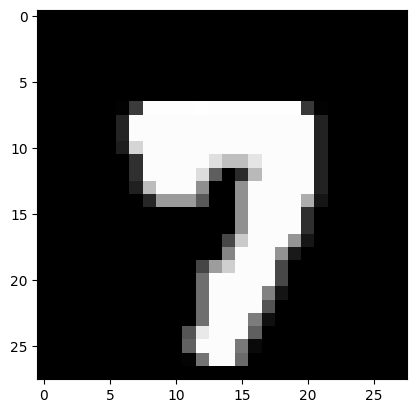

In [9]:
#quick testing cell
test_prediction(969, W1, b1, W2, b2)

In [10]:
#dev_set testing
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 6 2 5 5 9 8 2 4 2 2 4 3 3 9 1 8 8 4 7 9 3 1 9 3 9 3 8 1 9 8 9 5 4 4 1 9
 9 9 0 8 1 1 8 3 9 1 3 6 2 7 2 5 3 0 7 5 7 2 4 0 8 6 8 2 5 9 9 6 0 0 0 1 5
 8 1 0 5 9 2 2 0 3 0 5 3 8 1 9 3 0 3 0 5 7 6 9 9 6 7 8 4 9 2 9 0 0 3 8 3 1
 2 0 9 2 2 2 8 0 3 2 1 7 1 0 6 3 9 7 8 1 7 3 9 3 1 4 6 5 7 4 7 2 4 2 4 7 0
 0 5 4 4 2 0 9 1 5 1 3 4 8 7 0 1 6 7 4 6 4 3 5 1 2 5 1 8 7 8 6 9 9 1 3 6 9
 8 9 8 7 9 6 1 3 0 2 2 3 3 7 8 4 6 2 1 3 0 1 5 7 8 0 6 9 4 1 6 5 0 2 9 1 1
 6 1 4 7 5 0 0 2 7 3 2 9 4 4 2 5 2 8 8 3 6 7 1 4 2 0 0 1 0 0 6 8 5 0 4 4 1
 6 7 6 6 3 6 7 7 8 2 5 6 5 9 8 1 1 3 7 5 3 2 7 1 5 5 2 4 4 9 1 3 7 9 0 8 1
 0 2 9 2 9 3 8 8 1 6 1 6 6 3 6 1 5 5 1 4 1 4 6 4 3 7 3 4 8 2 4 3 9 3 3 5 0
 1 3 3 4 2 7 0 9 0 3 1 9 7 9 2 9 1 1 2 2 5 5 7 6 3 5 4 4 4 9 7 7 1 4 6 2 6
 0 9 4 4 3 4 0 2 9 9 6 6 8 4 7 8 6 4 8 9 3 7 1 3 8 4 0 4 7 0 1 2 4 1 9 2 8
 7 5 9 3 3 7 5 7 7 7 1 7 4 7 5 9 3 6 1 2 4 9 2 7 0 0 9 5 3 1 6 3 5 2 0 1 0
 0 7 5 0 8 9 7 1 4 3 4 6 9 4 2 0 6 3 7 7 1 5 3 2 4 8 1 3 7 9 1 9 6 5 8 0 3
 0 5 7 6 5 3 4 6 6 6 2 9 

np.float64(0.932)